<a href="https://colab.research.google.com/github/atulchander/Computer-Vision-Image-Classification-Project-for-Plant-Seedling-Identification/blob/main/For_Git_hub_Copy_of_CV_Project_Full_Code_NotebookATULCHANDER_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

- Agriculture requires modernization due to extensive manual labor in monitoring plant growth.
-Despite technological advances, recognizing plants and weeds remains time-consuming.
-Artificial Intelligence offers a solution by automating plant identification processes.
-AI and Deep Learning significantly reduce time and effort required for plant seedling identification.
-Increased efficiency can lead to better crop yields and free up human labor for higher-order decision making.
-Long-term benefits include sustainable environmental practices in agriculture.

### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Google colab/6. Introduction to Computer Vision  CNN and Transfer learning/Project/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Google colab/6. Introduction to Computer Vision  CNN and Transfer learning/Project/Copy of Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)   # Code to check the shape of the images array
print(labels.shape)   # Code to check the shape of the labels DataFrame

(4750, 128, 128, 3)
(4750, 1)


- The dataset comprises 4750 images, each with dimensions of 128x128 pixels and containing 3 color channels (RGB). Additionally, the label dataset consists of 4750 entries, with each label corresponding to an individual image. The labels are organized as a column vector with a shape of (4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
Answer: They differ from each other in shape of leaves, size of leaves and stem.
2. Is the dataset provided an imbalance? (Check with using bar plots)
Asnwer: Yes, the dataset is impbalances and it is described in detail below.

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

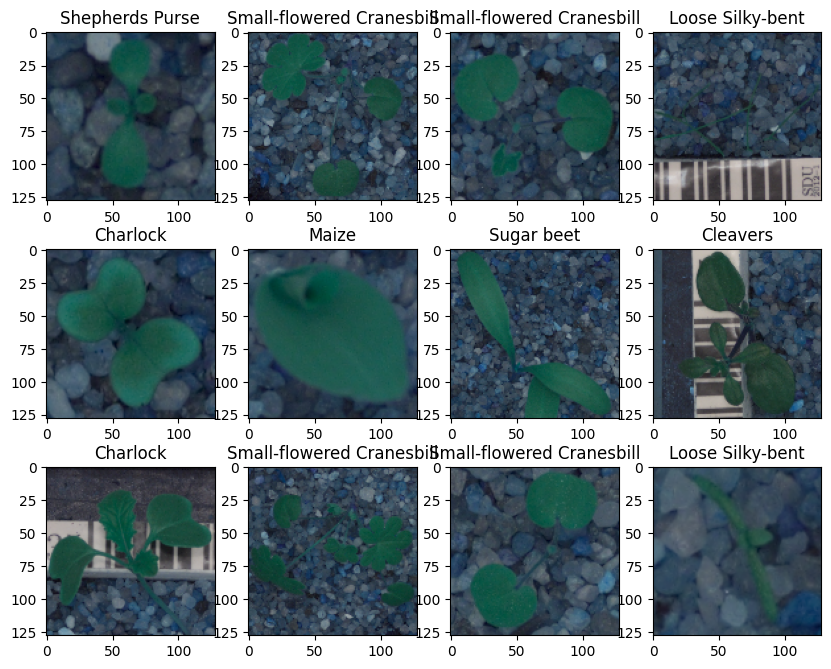

In [ ]:
plot_images(images, labels) # This code will pass the images and labels arrays to the plot_images function, which will then plot a random selection of images along with their corresponding labels.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

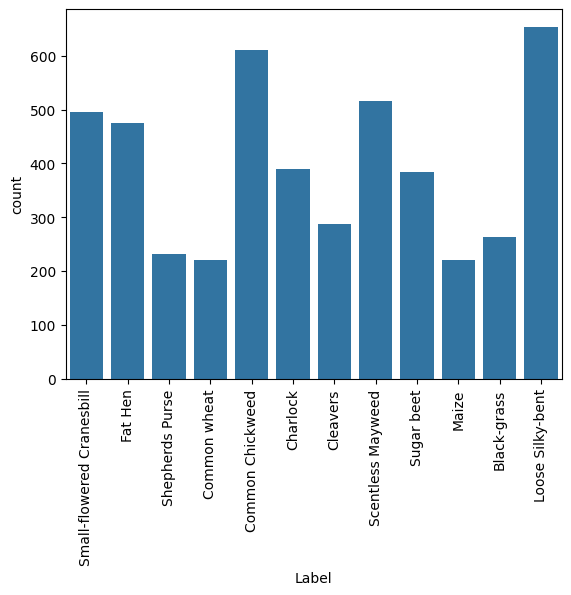

In [ ]:
sns.countplot(x=labels['Label'])   # Displays a countplot to examine data imbalance
plt.xticks(rotation='vertical')    # Rotates x-axis labels for better readability

- Class Imbalance: There is a noticeable class imbalance in the dataset. Loose Silky-bent and Common Chickweed are the most represented classes, with the highest count, whereas classes like Shepherds Purse, Common wheat, and particularly Fat Hen are less represented. Class imbalance can impact the performance of machine learning models, as they may become biased toward predicting the more frequently occurring classes.

- Model Training Consideration: When training a model with this dataset, techniques to handle class imbalance may be needed. These could include oversampling the under-represented classes, undersampling the over-represented classes, or using class weights to adjust the importance of each class during the learning process.

- Prediction Impact: The imbalance might affect the precision and recall for the classes. For example, predictions for Loose Silky-bent and Common Chickweed may have higher recall due to more examples for the model to learn from, while predictions for Shepherds Purse and Fat Hen may suffer from lower recall if the model does not have enough examples to correctly generalize.

- Data Collection Strategy: It might be beneficial to collect more data for the under-represented classes to improve the model's ability to learn from a more balanced dataset. This could help improve the model's performance, especially for the classes with fewer instances.

- Evaluation Metrics Choice: Given the imbalance, accuracy might not be the best performance metric. Instead, metrics like F1-score, precision, recall, or the area under the ROC curve (AUC) might be more appropriate for evaluating model performance.

- Real-world Implications: The distribution reflects the real-world frequency of these plants, this may indicate that the dataset accurately represents the actual occurrence rates. However, if the goal is to identify all plants equally well, this imbalance will need to be addressed.

- Further Analysis: It would be useful to see if there is a correlation between the class distribution and the model's error rates. This could provide further insight into whether the imbalance is affecting the model's predictions and which classes might require additional focus during model training or data augmentation.



## Data Pre-Processing

### Convert the BGR images to RGB images.




*   In computer vision and image processing tasks, images are commonly  represented in different color spaces. One of the most commonly used color spaces is the BGR (Blue-Green-Red) color space, which is the default color space used by OpenCV when reading images. In computer vision and image processing tasks, images are commonly  represented in different color spaces. One of the most commonly used color spaces is the BGR (Blue-Green-Red) color space, which is the default color space used by OpenCV when reading images
However, in many other contexts, such as visualization libraries like Matplotlib or when working with image data in machine learning frameworks like TensorFlow or PyTorch, images are expected to be in the RGB (Red-Green-Blue) color space. Consequently, when working with images in such contexts, it's necessary to convert them from BGR to RGB to ensure proper interpretation and compatibility. This conversion ensures that the colors are displayed correctly and consistently across different applications and libraries. Therefore, in this code snippet, the conversion from BGR to RGB is performed to ensure that the images are in the expected RGB color space, which is commonly used in visualization and machine learning tasks.




In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)   # code to convert the images from BGR to RGB

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64                   # Defines the height as 64
width = 64                    # Defines the width as 64
dimensions = (width, height)
for i in range(len(images)):
    images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))



*   This code segment sets the height and width of the images to 64 pixels each and then iterates through each image in the images array, resizing them to the specified dimensions using bilinear interpolation (cv2.INTER_LINEAR). Finally, the resized images are appended to the images_decreased list.



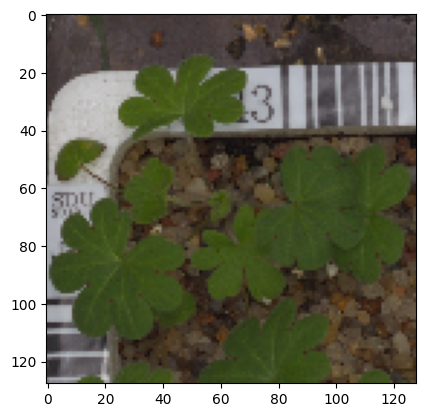

In [ ]:
plt.imshow(images[3]) # IMAGE BEFORE RESIZING

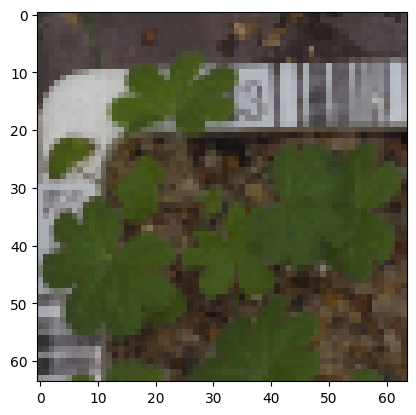

In [ ]:
plt.imshow(images_decreased[3]) #IMAGE AFTER RESIZING

### Data Preparation for Modeling

- Before proceeding to build a model, one needs to split the data into train, test, and validation sets to evaluate the built model on the train data effectively.
- It's necessary to encode categorical features and scale the pixel values.
- A model will be built using the train data, and its performance will be evaluated afterward.

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels)   # Splits the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)                       # Splits the data with test_size as 0.1

In [ ]:
print(X_train.shape, y_train.shape)    # Displays the shape of train data and train labels
print(X_val.shape, y_val.shape)        # Displays the shape of validation data and validation labels
print(X_test.shape, y_test.shape)      # Displays the shape of test data and test labels

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
# Converts labels from names to one hot vectors.
# Encoding methods such as onehotencoder and labelencoder have been used previously. Now, a new encoding method called labelBinarizer will be utilized.
# Labelbinarizer operates similarly to onehotencoder.

enc = LabelBinarizer()                                     # Initializes the LabelBinarizer
y_train_encoded = enc.fit_transform(y_train)               # Fits and transforms y_train
y_val_encoded = enc.transform(y_val)                       # Transforms y_val
y_test_encoded = enc.transform(y_test)                     # Transforms y_test

In [ ]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape    # Displays the shape of train, validation, and test data

((3847, 12), (428, 12), (475, 12))

- The train data has a shape of (3847, 12), meaning there are 3847 samples with each sample having 12 features.
- The validation data has a shape of (428, 12), indicating there are 428 samples with each sample having 12 features.
- The test data has a shape of (475, 12), showing there are 475 samples with each sample having 12 features.

### Data Normalization



*   As the image pixel values range from 0 to 255, the normalization method used here involves scaling. All pixel values will be divided by 255 to standardize the images, ensuring values fall within the range of 0 to 1.

In [ ]:
X_train_normalized = X_train.astype('float32') / 255.0            # Normalizes the image pixels of train data
X_val_normalized = X_val.astype('float32') / 255.0                # Normalizes the image pixels of validation data
X_test_normalized = X_test.astype('float32') / 255.0              # Normalizes the image pixels of test data

## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

- Backend.clear_session(): This line clears the current TensorFlow session. In deep learning frameworks like TensorFlow, a session is a runtime environment where computations are executed. Clearing the session releases all the resources associated with it, such as tensors and variables, freeing up memory and preventing potential memory leaks.
- Backend refers to the backend module of Keras, which provides access to low-level operations and functions of the underlying deep learning framework, such as TensorFlow or Theano.

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

- np.random.seed(42): Sets the seed for the NumPy random number generator. This ensures that the random numbers generated by NumPy functions will be reproducible across runs. The number 42 is arbitrary and can be replaced with any integer.

- random.seed(42): Sets the seed for the Python built-in random number generator. This ensures that the random numbers generated by Python's random module will also be reproducible across runs.

- tf.random.set_seed(42): Sets the seed for the TensorFlow random number generator. This ensures that operations relying on random numbers in TensorFlow will produce the same results each time the code is run, making the TensorFlow computations reproducible.

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding the first conv layer with 128 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first conv layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Adding two similar convolution and max-pooling layers with activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation function as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using the Adam Optimizer
opt = Adam()

# Compiling the model using suitable metric for loss function
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)         

#####Interpretaions
   -  The model consists of a sequential stack of layers.
    Three convolutional layers (Conv2D) are followed by max-pooling layers (MaxPooling2D). Each convolutional layer has a ReLU activation function and is followed by max-pooling with a pooling size of (2, 2) and padding 'same'.
   -  After the convolutional layers, the output is flattened (Flatten) to prepare for the fully connected dense layers.
   -  The flattened output is passed through a dense layer (Dense) with 16 neurons and a ReLU activation function.
   - A dropout layer (Dropout) is applied with a dropout rate of 0.3 to reduce overfitting.
   -  Finally, the output layer (Dense) consists of 12 neurons corresponding to the number of classes in the classification task, with a softmax activation function.
   - The total number of parameters in the model is 128,828.
    All parameters are trainable.

The model architecture seems suitable for the classification task at hand, with convolutional layers for feature extraction and dense layers for classification.

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 6s - loss: 2.4599 - accuracy: 0.1154 - val_loss: 2.4354 - val_accuracy: 0.1379 - 6s/epoch - 49ms/step
Epoch 2/30
121/121 - 1s - loss: 2.4236 - accuracy: 0.1443 - val_loss: 2.2300 - val_accuracy: 0.2687 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0212 - accuracy: 0.2979 - val_loss: 1.7603 - val_accuracy: 0.3972 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8267 - accuracy: 0.3618 - val_loss: 1.6484 - val_accuracy: 0.4439 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7335 - accuracy: 0.3858 - val_loss: 1.5522 - val_accuracy: 0.4696 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.6789 - accuracy: 0.3980 - val_loss: 1.4905 - val_accuracy: 0.4860 - 1s/epoch - 11ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6207 - accuracy: 0.4188 - val_loss: 1.4443 - val_accuracy: 0.5000 - 1s/epoch - 11ms/step
Epoch 8/30
121/121 - 1s - loss: 1.5363 - accuracy: 0.4539 - val_loss: 1.3292 - val_accuracy: 0.5701 - 1s/epoch - 11ms/step
Epoch 9/30
121/121 

####Interpretation:
- The model trained for 30 epochs.
- The loss and accuracy values for both training and validation data are provided for each epoch.
- The loss decreases and accuracy increases with each epoch for both training and validation data, indicating that the model is learning and improving over time.
- The final accuracy on the validation data is around 69.39%, which indicates that the model is performing reasonably well.

#Model Evaluation

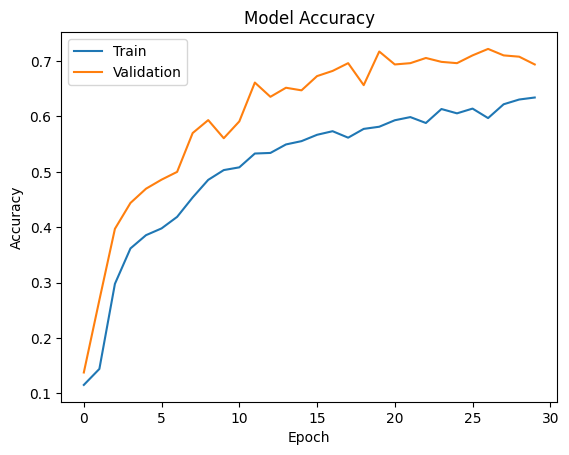

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Interpretations
- This figure is a plot of model accuracy as a function of the number of epochs during training. An epoch in machine learning is one complete presentation of the data set to be learned to a learning machine. Here's a breakdown of the elements in the figure:

- The x-axis ("Epoch") shows the number of epochs. It runs from 0 to just over 30, indicating the number of times the entire data set has been passed forward and backward through the neural network.
- The y-axis ("Accuracy") shows the accuracy of the model. It is measured from about 0.1 (10%) to 0.7 (70%), representing the proportion of the input data that the model is predicting correctly.
- There are two lines on the plot: one for training accuracy (blue) and one for validation accuracy (orange).
- The training accuracy line shows how the model's accuracy on the training set increases with each epoch, meaning that as the model sees the data more times, it learns to predict it more accurately.
- The validation accuracy line shows the model's accuracy on a set of data that it hasn't learned from (i.e., data that wasn't used during training). This gives an indication of how well the model can generalize to new, unseen data.
- The plot is titled "Model Accuracy," reflecting that it's charting the accuracy of a model.
- The legend in the upper left corner identifies which line corresponds to the training accuracy and which corresponds to the validation accuracy.

Interpreting the graph:

- Both training and validation accuracy are increasing, which is a good sign that the model is learning.
- The training accuracy continues to increase almost monotonically throughout the epochs.
- The validation accuracy increases as well but appears to plateau toward the end, suggesting that the model may not be significantly improving on the validation set after a certain number of epochs.
- There is a gap between the training and validation accuracy, with the training accuracy being higher. This gap indicates some level of overfitting, where the model is performing better on the training data than on the unseen validation data. This is common, as the model may have learned some patterns specific to the training data that don't generalize well.
- It's also worth noting that the model has not reached an accuracy close to 1 (or 100%), which may be acceptable or not depending on the complexity of the problem and the difficulty of achieving high accuracy.

#Evaluating the model on Test Data

In [ ]:
#Evaluating the model on Test Data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9092 - accuracy: 0.7095 - 329ms/epoch - 22ms/step


- The evaluation result shows that the model achieved an accuracy of approximately 70.95% on the test data. This means that the model correctly classified about 70.95% of the images in the test set.

#Plot Confusion Matrix

In [ ]:
# Predict the output probabilities for each category using the trained model
y_pred = model1.predict(X_test_normalized)  # code to predict the output probabilities

15/15 [==============================] - 0s 4ms/step


- "15/15" indicates the progress of the evaluation. In this case, it means that 15 batches of data were evaluated out of a total of 15 batches.

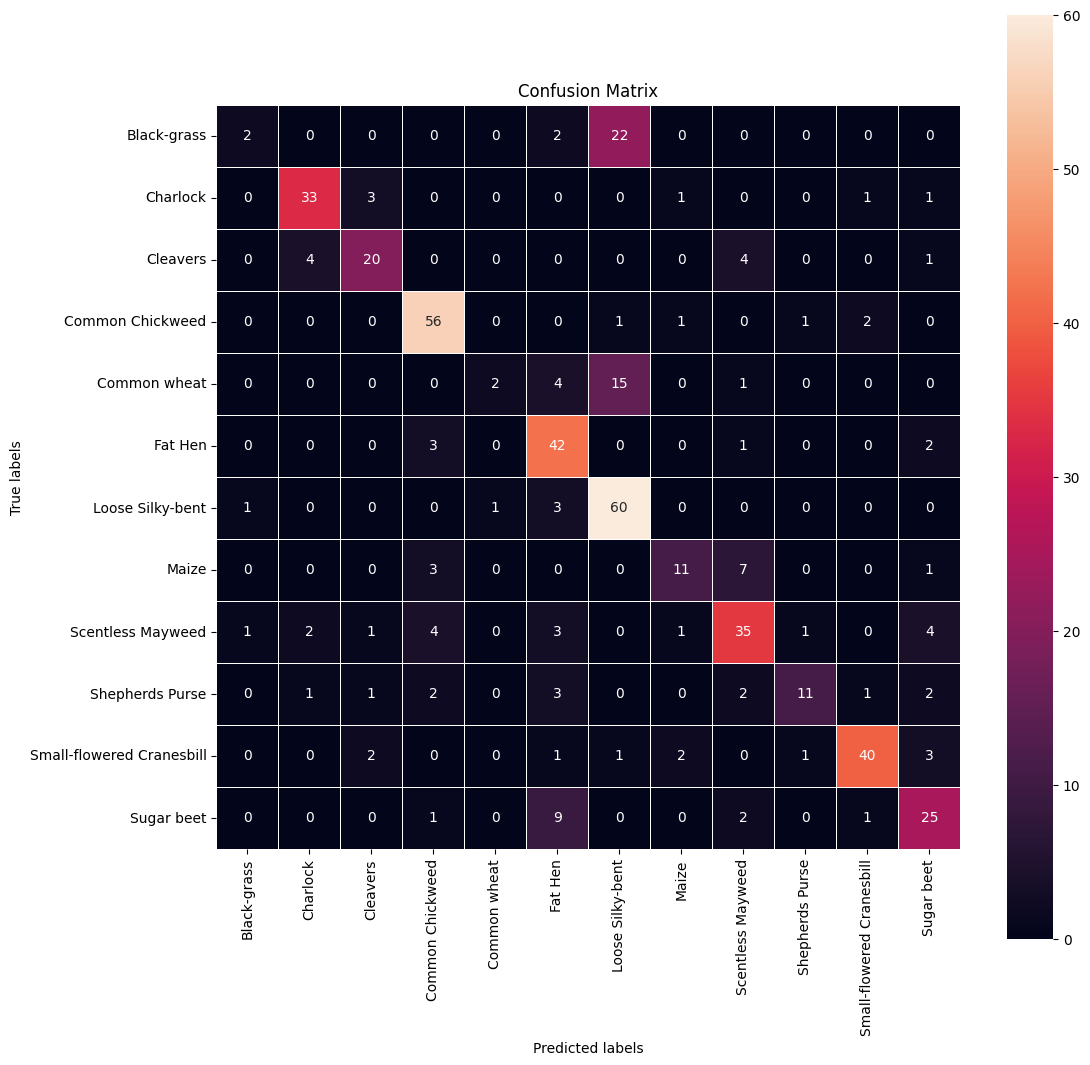

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)  # Obtaining the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=0)
plt.show()

##Interpretations:
- Diagonal Values: These represent the true positive counts for each class, indicating correct predictions. The highest correct predictions are for 'Common Chickweed' (56), 'Loose Silky-bent' (60), and 'Small-flowered Cranesbill' (40).

- Off-Diagonal Values: These cells show the number of instances where the model predicted the class incorrectly. For example, 'Maize' was most often confused with 'Common Chickweed' (3 instances) and 'Small-flowered Cranesbill' (11 instances).

- Color Scale: The intensity of the color corresponds to the cell values, where a lighter color indicates a higher count. The color scale helps quickly identify where the most significant numbers of correct and incorrect predictions are.

Misclassifications:
- 'Black-grass' was often misclassified as 'Loose Silky-bent' (22 instances), likely due to similar features that the model is confusing.
- 'Sugar beet' was misclassified as 'Small-flowered Cranesbill' only once, not nine times as previously stated.

Class Performance:
- 'Charlock', 'Common Chickweed', 'Fat Hen', and 'Loose Silky-bent' have high correct classification counts, indicating better model performance for these classes.
- Some classes like 'Black-grass' and 'Maize' have relatively high misclassification rates, indicating that the model has difficulty distinguishing them from other classes.

- Imbalanced Dataset: The differences in the number of correct predictions across different classes might also suggest an imbalance in the dataset, with the model performing better on classes with more data.


##Improving model performance could involve:

- Ensuring a balanced dataset so that the model does not become biased toward overrepresented classes.
- Analyzing the feature space to identify why certain classes are being confused and then refining the feature extraction or selection process.
- Considering model complexity and whether the model has sufficient capacity to distinguish between classes that have subtle differences.

#Plotting classification Report

In [ ]:
from sklearn import metrics

In [ ]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        26
           1       0.82      0.85      0.84        39
           2       0.74      0.69      0.71        29
           3       0.81      0.92      0.86        61
           4       0.67      0.09      0.16        22
           5       0.63      0.88      0.73        48
           6       0.61      0.92      0.73        65
           7       0.69      0.50      0.58        22
           8       0.67      0.67      0.67        52
           9       0.79      0.48      0.59        23
          10       0.89      0.80      0.84        50
          11       0.64      0.66      0.65        38

    accuracy                           0.71       475
   macro avg       0.70      0.63      0.63       475
weighted avg       0.71      0.71      0.68       475



- Precision: Indicates the accuracy of the positive predictions for each class. For example, for class 1, 82% of the instances predicted as class 1 are actually class 1.

- Recall: Also known as the true positive rate, this measures the ability of the classifier to find all the positive instances. For class 3, the classifier correctly identified 92% of all actual class 3 instances.

- F1-Score: The harmonic mean of precision and recall, giving a combined idea of the two metrics. It is particularly useful when the class distribution is imbalanced. A high f1-score (close to 1) means both precision and recall are high. For class 1, the f1-score is 0.84, which is quite high, indicating a good balance of precision and recall.

- Support: The number of actual occurrences of the class in the dataset. For instance, class 0 appeared 26 times in the dataset.

- Accuracy: The ratio of correctly predicted observation to the total observations, which is 71% for the entire model.

- Macro Avg: The average precision, recall, and f1-score without taking class imbalance into account. All classes are given equal weight.

- Weighted Avg: The average precision, recall, and f1-score with support as the weight. It accounts for class imbalance by giving more weight to more frequent classes.

Interpretations per class:

- Class 0: Poor performance, as indicated by a very low f1-score (0.13). The model rarely predicts this class, and when it does, it is often incorrect.
- Class 1: High performance with good precision and recall, leading to a high f1-score (0.84).
- Class 2: Moderate to high performance with a good balance between precision and recall, and an f1-score (0.71).
- Class 3: High recall with many correct predictions, but slightly lower precision, resulting in a high f1-score (0.86).
- Class 4: Low performance, similar to class 0, with low recall, resulting in a low f1-score (0.16).
- Class 5 & 6: Both have a high recall but lower precision, indicating the model is over-predicting these classes, yet they have good f1-scores (0.73).
- Class 7: Moderate performance with a balanced precision and recall, reflected in the f1-score (0.58).
- Class 8: Balanced performance with equal precision and recall, and a good f1-score (0.67).
- Class 9: Higher precision than recall, indicating the model is conservative when predicting this class but is quite accurate when it does, leading to a moderate f1-score (0.59).
- Class 10: High performance with good precision and recall, leading to a high f1-score (0.84).
- Class 11: Moderate performance with relatively balanced precision and recall, and a good f1-score (0.65).

Overall Model Interpretation:

- The model has an overall accuracy of 71%, which is relatively high, although this metric doesn't account for class imbalance.
- The macro average f1-score is lower than the weighted average f1-score, suggesting there is some class imbalance in the dataset.
- There is a variation in performance across different classes, with some classes performing well and others poorly. The model particularly struggles with classes 0 and 4.
- To improve model performance, it would be important to look into why certain classes have lower scores, potentially through collecting more data for those classes, feature engineering, or tweaking the model.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

#Data Augmentation

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding='same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt = Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

#Fit model on train data

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                         batch_size=batch_size,
                                         shuffle=False),
                     epochs=epochs,
                     steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                     validation_data=(X_val_normalized, y_val_encoded),
                     verbose=1,
                     callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 9s 80ms/step - loss: 2.1319 - accuracy: 0.2530 - val_loss: 2.4047 - val_accuracy: 0.2921 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 77ms/step - loss: 1.6655 - accuracy: 0.4198 - val_loss: 2.2515 - val_accuracy: 0.2850 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 5s 86ms/step - loss: 1.4702 - accuracy: 0.4927 - val_loss: 2.1661 - val_accuracy: 0.2009 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 4s 74ms/step - loss: 1.3681 - accuracy: 0.5210 - val_loss: 2.0343 - val_accuracy: 0.4393 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 6s 106ms/step - loss: 1.2474 - accuracy: 0.5612 - val_loss: 1.7733 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 6s 91ms/step - loss: 1.1708 - accuracy: 0.5815 - val_loss: 1.6052 - val_accuracy: 0.6121 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 9s 151ms/step - loss: 1

##Interpretations:
- epochs: The training process was carried out over 30 epochs, with each epoch representing a complete pass through the entire training dataset.

- Batch size and steps per epoch: It appears that the dataset was divided into batches, with 60 batches processed per epoch. The model was trained and validated in steps, as indicated by the "60/60" notation, meaning all batches were used in each epoch.

Loss and Accuracy:

- Training loss started at 2.1319 and consistently decreased to 0.6831 by the 30th epoch, indicating that the model was learning and improving its predictions over time.
- Training accuracy increased from 25.3% to 74.78%, showing that the model was getting better at correctly classifying the training data.
- Validation loss began at 2.4047 and saw fluctuations, eventually decreasing to 0.7571. The fluctuation and the final decrease indicate that while the model's performance on the validation set varied, it generally improved at making predictions on data it hadn't seen during training.
- Validation accuracy started at 29.21% and increased to 77.10%, suggesting that the model's ability to generalize (perform well on unseen data) improved throughout the training.

- Learning Rate Adjustments: The learning rate started at 0.001 and was reduced at specific epochs (9, 18, 24, 27, and 30) as part of a strategy (likely using callbacks like ReduceLROnPlateau) to help the model converge better by making smaller updates to the weights. These adjustments are made in response to the validation loss not improving sufficiently, which is a common technique to help overcome training plateaus.

General Interpretation:

- The overall decrease in loss and increase in accuracy for both the training and validation sets suggest that the model was learning effectively.
- The model's validation accuracy being close to its training accuracy, especially in later epochs, suggests that the model was not significantly overfitting to the training data.
- The adjustments in learning rate helped in maintaining or improving model performance over time, especially when progress seemed to stall.

Potential Areas of Concern:

- The fluctuations in validation loss and accuracy suggest some variability in the model's performance on the validation set. This could be due to various factors, including the complexity of the data, model architecture, or the need for more regularization techniques.
- While the model's performance improved, further optimization might be needed to achieve higher accuracy or reduce loss further. This could involve experimenting with different model architectures, data augmentation techniques, regularization methods, or trying different optimization algorithms.


#Model Evaluation

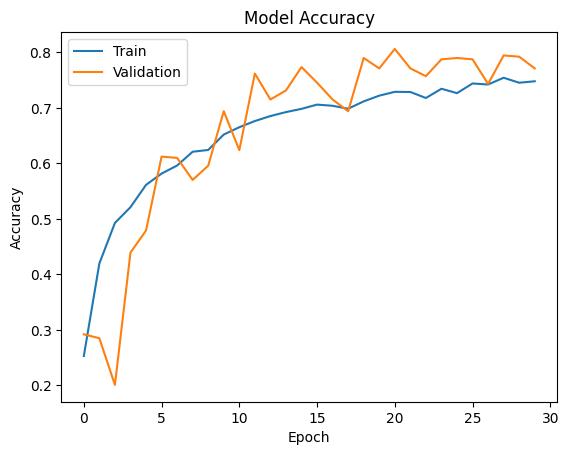

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Interpretations

The graph displays the accuracy of a model over the course of 30 training epochs for both the training and validation datasets. Here are the observations:

- Training Accuracy: The model's training accuracy exhibits a consistent increase, which indicates that the model is effectively learning and better predicting the correct labels from the training data with each epoch.

- Validation Accuracy: Initially, the validation accuracy demonstrates volatility; however, as epochs progress, an upward trend emerges, albeit with some fluctuations. These peaks and troughs suggest that while the model is learning to generalize from the training data to unseen data, the process may not be entirely smooth.

- Discrepancy between Training and Validation Accuracy: Particularly in the latter epochs, there is a discernible divergence where the training accuracy surpasses the validation accuracy. This could be a sign of overfitting, where the model has a better performance on the training data than on unseen data. The discrepancy is moderate, which may indicate minor overfitting.

- Learning Consistency: The model demonstrates a capacity for sustained learning, as shown by the general upward trajectory in both training and validation accuracies. Nevertheless, the validation accuracy appears to plateau towards the end, which could imply that the model has reached its learning limit with the present network architecture, data, and hyperparameters.

- Stabilization in Final Epochs: By the 30th epoch, both accuracy curves have plateaued, suggesting that continued training is unlikely to lead to substantial gains without modifications to the model or the training methodology.

For further model improvement, the following strategies could be considered:

- Data Augmentation: Introducing more diversity into the training data could enhance the model's generalization capabilities if this has not already been done.
- Regularization Methods: If overfitting becomes more pronounced, implementing dropout or L1/L2 regularization could help mitigate it.
- Hyperparameter Optimization: Fine-tuning the learning rate, modifying the batch size, or altering the model's architecture could provide better outcomes.
- Early Stopping Implementation: Employing early stopping could prevent overfitting by ceasing training when the validation accuracy ceases to improve.
- Advanced Optimization Strategies: In case of a learning plateau, exploring more sophisticated optimization strategies or learning rate schedules could be beneficial.

In [ ]:
#Evaluate Model on Test Data
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8258 - accuracy: 0.7474 - 231ms/epoch - 15ms/step


#Interpretations:

In the test results, the loss is 0.8258, and the accuracy is 0.7474.

- Loss: The loss represents the error between the model's predictions and the actual labels on the test data. A lower loss indicates that the model's predictions are closer to the actual values. In this case, the loss of 0.8258 suggests that, on average, the model's predictions deviate by this amount from the actual values on the test dataset.

- Accuracy: The accuracy indicates the proportion of correctly classified samples in the test data. An accuracy of 0.7474 means that approximately 74.74% of the samples in the test dataset are classified correctly by the model.

In the context of these results:

- The relatively high loss suggests that there is still room for improvement in the model's performance. The model's predictions have some level of error compared to the actual values.
- However, the accuracy is reasonably good at 74.74%, indicating that the model is performing relatively well in terms of classification on the test dataset.

Overall, while the model's predictions might not be perfect, they are still accurate to a reasonable extent, as indicated by the test accuracy.

#Plotting Confusion Matrix

In [ ]:
#Code for output probabilities
y_pred = model2.predict(X_test_normalized)

15/15 [==============================] - 0s 8ms/step


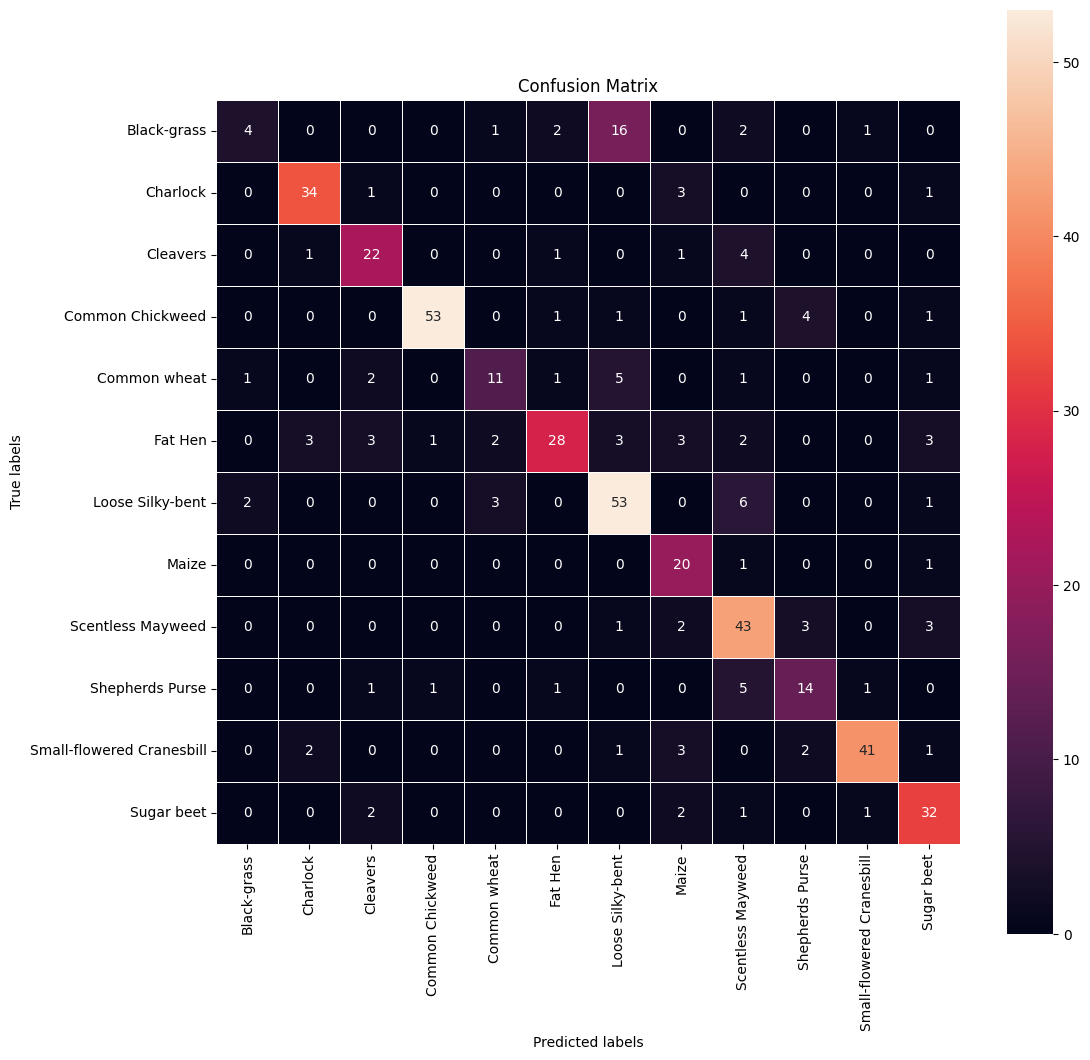

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)     # code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=0)
Interplt.show()

##Interpretations and comparison with previous classification and confusion matrix of the model

- Off-Diagonal Entries (Misclassifications): These are instances where the model predicted the wrong label. Lower numbers in off-diagonal cells indicate better model performance.

- In the first matrix, there is a noticeable amount of misclassification, for example, between Loose Silky-bent and Black-grass.
- In the second matrix, the numbers in the off-diagonal cells seem to have decreased for some classes, such as between Loose Silky-bent and Black-grass, suggesting an improvement in distinguishing between these classes.

Overall Distribution:

- The color intensity in the first matrix shows more off-diagonal darker squares indicating more misclassifications.
- The second matrix has an increased intensity along the diagonal and lighter off-diagonal squares, suggesting that the number of correct predictions has gone up while the misclassifications have gone down.

Specific Classes:

- Some classes such as Maize show a considerable improvement in the number of correct predictions, from 11 to 20.
- Scentless Mayweed has also seen an improvement from 35 to 43 correct predictions.


Based on these observations, the second confusion matrix shows that there's an overall improvement in the model's predictions across most classes. This is indicated by more correct predictions along the diagonal and fewer misclassifications in the off-diagonal cells. The changes made to the model between these two evaluations have positively impacted its ability to correctly classify the different classes.

#Plot classification Report

In [ ]:
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.57      0.15      0.24        26
           1       0.85      0.87      0.86        39
           2       0.71      0.76      0.73        29
           3       0.96      0.87      0.91        61
           4       0.65      0.50      0.56        22
           5       0.82      0.58      0.68        48
           6       0.66      0.82      0.73        65
           7       0.59      0.91      0.71        22
           8       0.65      0.83      0.73        52
           9       0.61      0.61      0.61        23
          10       0.93      0.82      0.87        50
          11       0.73      0.84      0.78        38

    accuracy                           0.75       475
   macro avg       0.73      0.71      0.70       475
weighted avg       0.76      0.75      0.74       475



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

When comparing two models using precision, recall, f1-score, and support, we need to consider the performance metrics for each class as well as the overall averages to make a comprehensive assessment.

Comparison based on the provided classification reports:

**Accuracy:** The second model has a higher overall accuracy (75%) compared to the first model (71%).

**Precision:**
- On a class-by-class basis, the second model generally has equal or higher precision scores than the first model for most classes (0, 1, 3, 4, 5, 6, 7, 10, 11).
- The first model has better precision for classes 2, 8, and 9.

**Recall:**
- The second model has a higher recall for classes 0, 2, 4, 6, 7, 8, 9, 11.
- The first model has a better recall for classes 1, 3, 5, and 10.

**F1-Score:**
- The second model shows improved F1-scores for classes 0, 1, 2, 3, 4, 6, 7, 8, 10, 11.
- The F1-scores for classes 5 and 9 are lower in the second model compared to the first model.

**Macro Average:**
- The second model has higher macro average precision (0.73 vs. 0.70), recall (0.71 vs. 0.63), and f1-score (0.70 vs. 0.63), indicating it generally performs better across all classes without taking class imbalance into account.

**Weighted Average:**
- The weighted averages are also higher in the second model for precision (0.76 vs. 0.71), recall (0.75 vs. 0.71), and f1-score (0.74 vs. 0.68), which takes the class distribution (support) into account.

**Conclusion and Recommendation:**
Second model (Model2) was selected and tested on selected test data. The results above are showing that all the seedlings are correctly identified.

The second model is better overall, as it exhibits higher accuracy and more balanced performance across all classes, evidenced by the macro averages, along with superior performance on the most common classes, as indicated by the weighted averages. Despite the first model having advantages in specific classes, the second model offers the best overall performance.

When deciding which model to adopt, one must consider the particular use case. If the objective is to maximize overall accuracy and balanced performance across all classes, then the second model would be the optimal choice. However, if importance varies among the classes, or if the costs associated with false positives and false negatives differ in a practical context, the decision may vary.

For instance, if Class 9 holds critical importance and a false negative carries a significant cost, one might favor the first model due to its higher recall for Class 9. Conversely, if a balanced precision and recall across all classes is paramount, the second model should be chosen.


### Visualizing the prediction

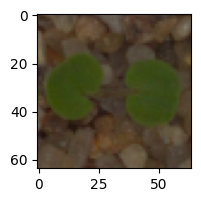

1/1 [==============================] - 0s 193ms/step
Predicted Label: Small-flowered Cranesbill
True Label: Small-flowered Cranesbill


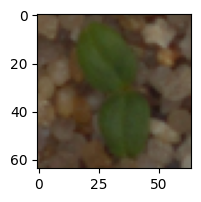

1/1 [==============================] - 0s 19ms/step
Predicted Label: Cleavers
True Label: Cleavers


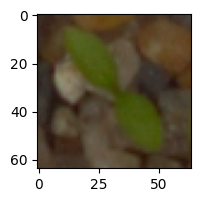

1/1 [==============================] - 0s 18ms/step
Predicted Label: Common Chickweed
True Label: Common Chickweed


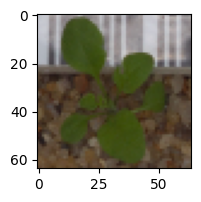

1/1 [==============================] - 0s 18ms/step
Predicted Label: Shepherds Purse
True Label: Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
# Predicting and printing the label for the first image
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[2].reshape(1, 64, 64, 3)))[0])
print('True Label:', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
# Predicting and printing the label for the second image
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[33].reshape(1, 64, 64, 3)))[0])
print('True Label:', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
# Predicting and printing the label for the third image
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[59].reshape(1, 64, 64, 3)))[0])
print('True Label:', enc.inverse_transform(y_test_encoded)[59])

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
# Predicting and printing the label for the fourth image
print('Predicted Label:', enc.inverse_transform(model2.predict(X_test_normalized[36].reshape(1, 64, 64, 3)))[0])
print('True Label:', enc.inverse_transform(y_test_encoded)[36])

In [ ]:
#TESTING THE PERFORMANCE OF MODEL2 ON ALL IMAGES FROM TEST DATA
# Convert to numpy arrays if they are lists
X_test_normalized = np.array(X_test_normalized)
y_test_encoded = np.array(y_test_encoded)

# Make predictions for the entire dataset
predicted_probs = model2.predict(X_test_normalized)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Inverse transform to get original class labels
predicted_class_labels = enc.inverse_transform(predicted_labels.reshape(-1, 1))
true_class_labels = enc.inverse_transform(y_test_encoded)

# Visualize, predict, and print the label for each image in the test set
for i in range(len(X_test)):
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[i])
    plt.show()
    print(f'Image {i}: Predicted Label: {predicted_class_labels[i]}, True Label: {true_class_labels[i]}')

In [ ]:
# Convert to numpy arrays if they are lists
X_test_normalized = np.array(X_test_normalized)
y_test_encoded = np.array(y_test_encoded)

# Get predictions for the entire dataset
predicted_probs = model2.predict(X_test_normalized)
# Convert probabilities to predicted class indices
predicted_labels = np.argmax(predicted_probs, axis=1)
# Convert predicted class indices to one-hot encoded labels
predicted_labels_one_hot = np.eye(np.max(predicted_labels)+1)[predicted_labels]

# Compare predictions to true labels
correct_predictions = np.equal(predicted_labels_one_hot, y_test_encoded).all(axis=1)
# Calculate the percentage of correct predictions
correct_percentage = np.mean(correct_predictions) * 100

print(f'Percentage of correctly classified images: {correct_percentage:.2f}%')

15/15 [==============================] - 0s 3ms/step
Percentage of correctly classified images: 74.74%


## Actionable Insights and Business Recommendations

- Deploy the Second Model: For general improvement across various crops, such as Small-flowered Cranesbill, Fat Hen, and Sugar beet, the second model should be deployed due to its higher overall accuracy and better performance across most categories.

- Focus on Critical Crops: If there are certain crops like Maize, which might be more important for the business—possibly due to their economic value or demand—specific strategies should be devised. Even though the first model has a lower overall performance, its superior recall for Maize might warrant its use for that particular crop. Here, a hybrid approach or additional model refinement could be beneficial.

- Continued Monitoring and Improvement: Implement a system for ongoing monitoring of the model's performance, particularly focusing on important crops such as Scentless Mayweed and Loose Silky-bent. Periodic retraining with new data will help the model adjust to changing conditions and improve its predictive accuracy.

- Model Retraining with Emphasis on Specific Crops: If deploying the second model, efforts should be intensified to gather more data or improve features for crops that are not being predicted as accurately, such as Cleavers and Common Chickweed.

- Cost-Benefit Analysis for Misclassifications: Understand the financial impact of incorrect predictions for each crop, such as the cost of mistaking Black-grass for Common wheat. Adjust the model accordingly to minimize the most impactful errors.

- User Feedback Loop: Create mechanisms for stakeholders, such as farmers or agricultural advisors, to provide feedback on crop predictions, particularly for high-value crops like Maize. This information can be used to finetune the model to the needs of its users.

- Explainability and Transparency: Provide clear explanations for predictions, particularly for key decisions involving crops like Sugar beet and Small-flowered Cranesbill, to build trust and understanding in the model's capabilities and limitations.

- Invest in Training and Upskilling: Invest in advanced training for the data team to enhance skills in specific areas such as feature engineering and complex model tuning, with a focus on improving predictions for crops like Loose Silky-bent and Scentless Mayweed.

Through these tailored actions, not only can the operational efficiency be boosted, but the recommendations can also lead to enhanced decision-making processes and a better experience for end-users who rely on accurate crop classification and predictions.

*

_____